# K-Means Clustering Analysis for MNIST Dataset

This notebook implements and analyzes K-Means clustering on the MNIST handwritten digits dataset. We'll explore:

1. Data loading and exploration
2. K-Means implementation
3. Cluster validation using multiple metrics
4. Analysis of different K values
5. Classification based on clustering

In [6]:
# Add the parent directory to path to import from src
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Import our modules
from src.data_loader import load_mnist, visualize_sample_digits
from src.kmeans import KMeans
from src.metrics import calculate_all_metrics
from src.visualization import (
    visualize_centroids, 
    plot_digit_clusters, 
    plot_cluster_distribution,
    plot_clustering_metrics,
    visualize_pca_clusters
)
from src.utils import (
    run_kmeans_multiple_k, 
    find_optimal_k, 
    classify_test_data, 
    create_summary_table,
    save_results
)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Exploration

In [7]:
# Load MNIST dataset
train_features, train_labels, test_features, test_labels = load_mnist(
    train_path='../data/train.csv',
    test_path='../data/test.csv',
    normalize=True
)

Loading training data from ../data/train.csv...
Loading test data from ../data/test.csv...
Loaded 999 training samples and 999 test samples
Each sample has 784 features


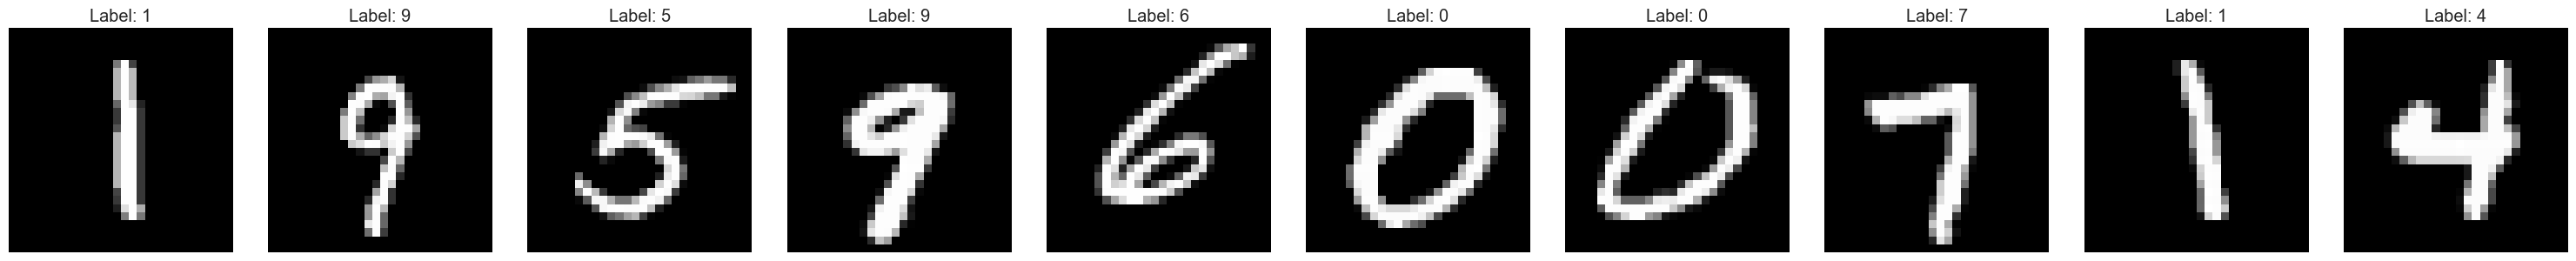

In [8]:
# Visualize some sample digits
visualize_sample_digits(train_features, train_labels, n_samples=10)

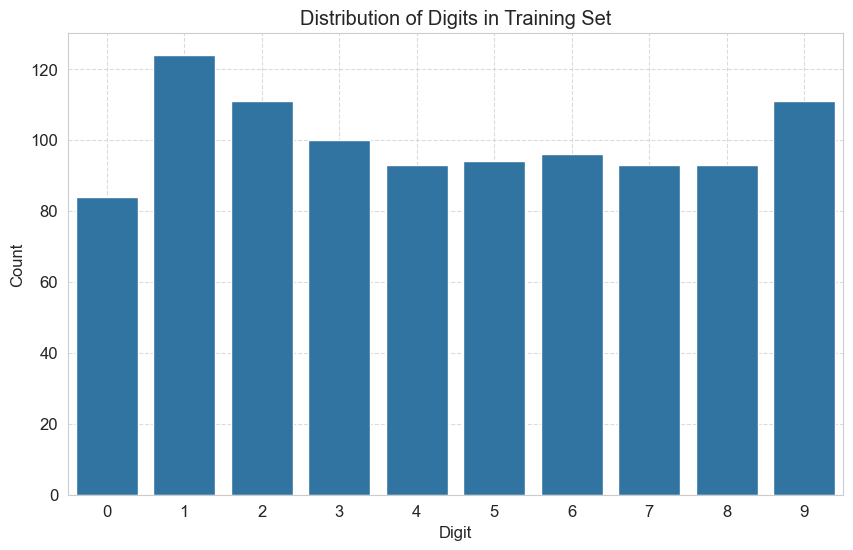

In [9]:
# Display distribution of digits in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 2. Test K-Means Implementation

In [10]:
# For testing, use a smaller subset to speed up computation
n_samples = 1000
#sample_indices = np.random.choice(len(train_features), n_samples, replace=False)
X_subset = train_features
y_subset = train_labels

print(f"Using a subset of {n_samples} samples for faster testing")

Using a subset of 1000 samples for faster testing


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 213.79it/s]

Converged after 20 iterations


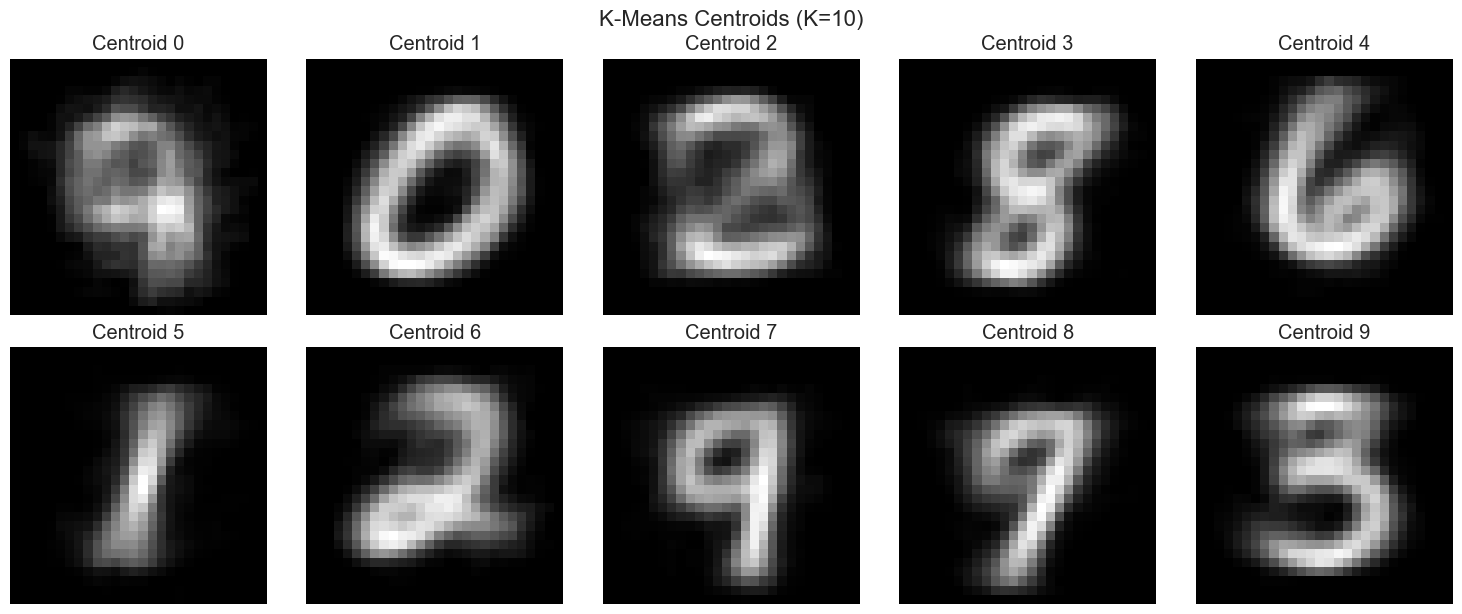

In [11]:
# Test K-Means with K=10 (one cluster for each digit)
kmeans_test = KMeans(n_clusters=10, random_state=42)
kmeans_test.fit(X_subset)

# Visualize centroids
visualize_centroids(kmeans_test)

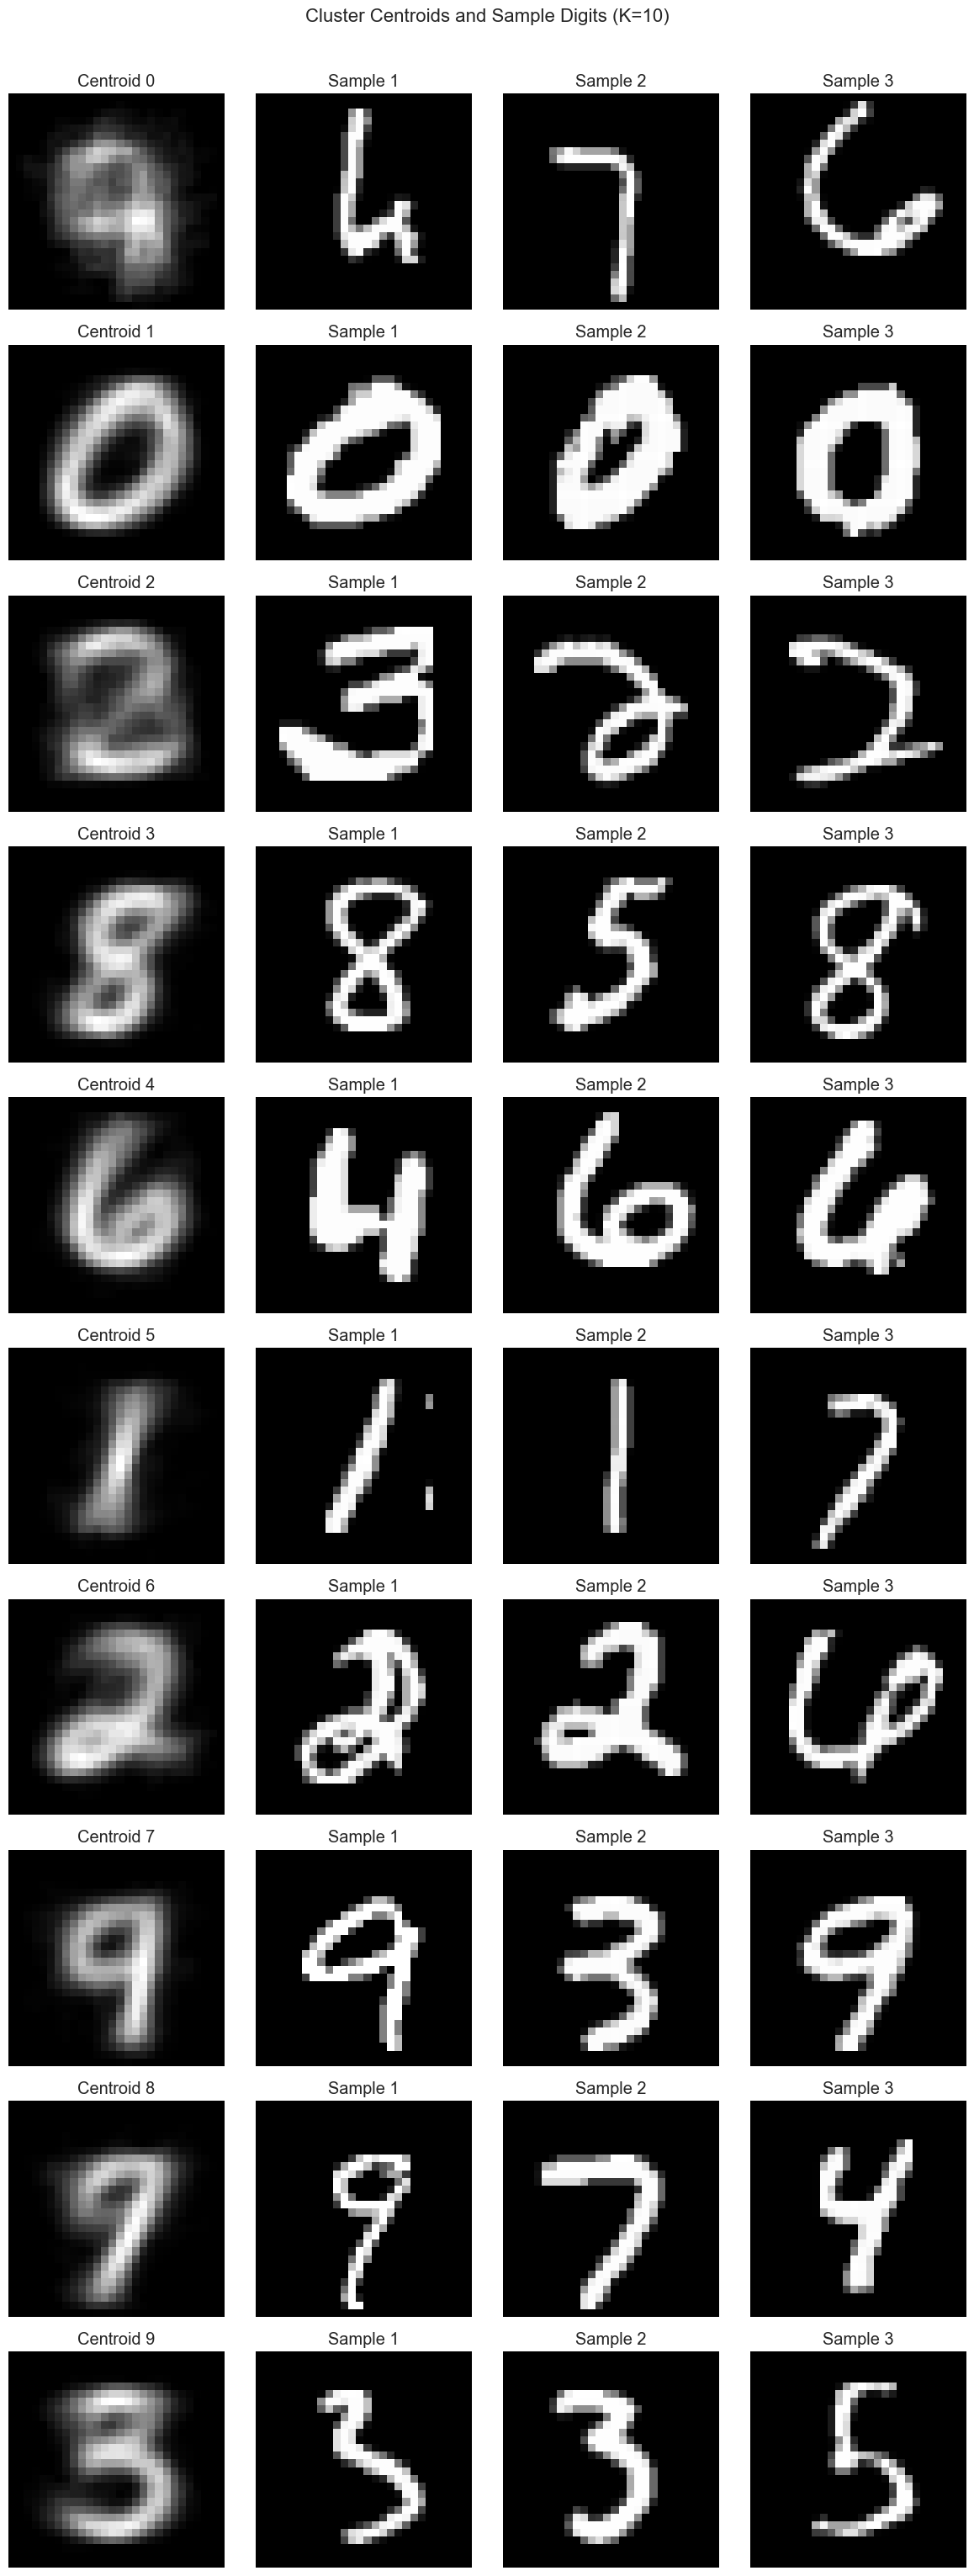

In [12]:
# Show sample digits from each cluster
plot_digit_clusters(X_subset, kmeans_test.labels, kmeans_test.centroids, n_per_cluster=3)

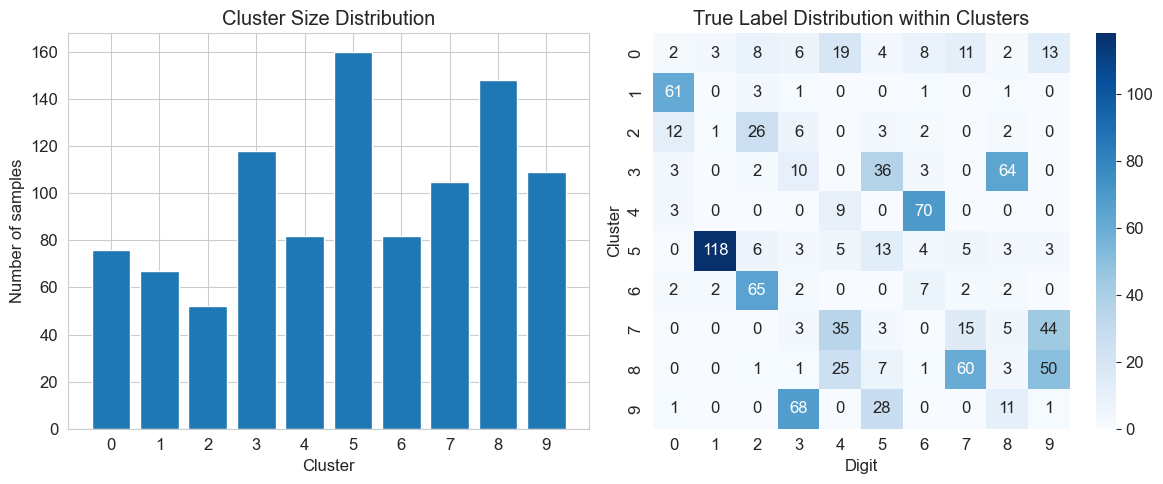

In [13]:
# Visualize the distribution of clusters
plot_cluster_distribution(kmeans_test.labels, y_subset)

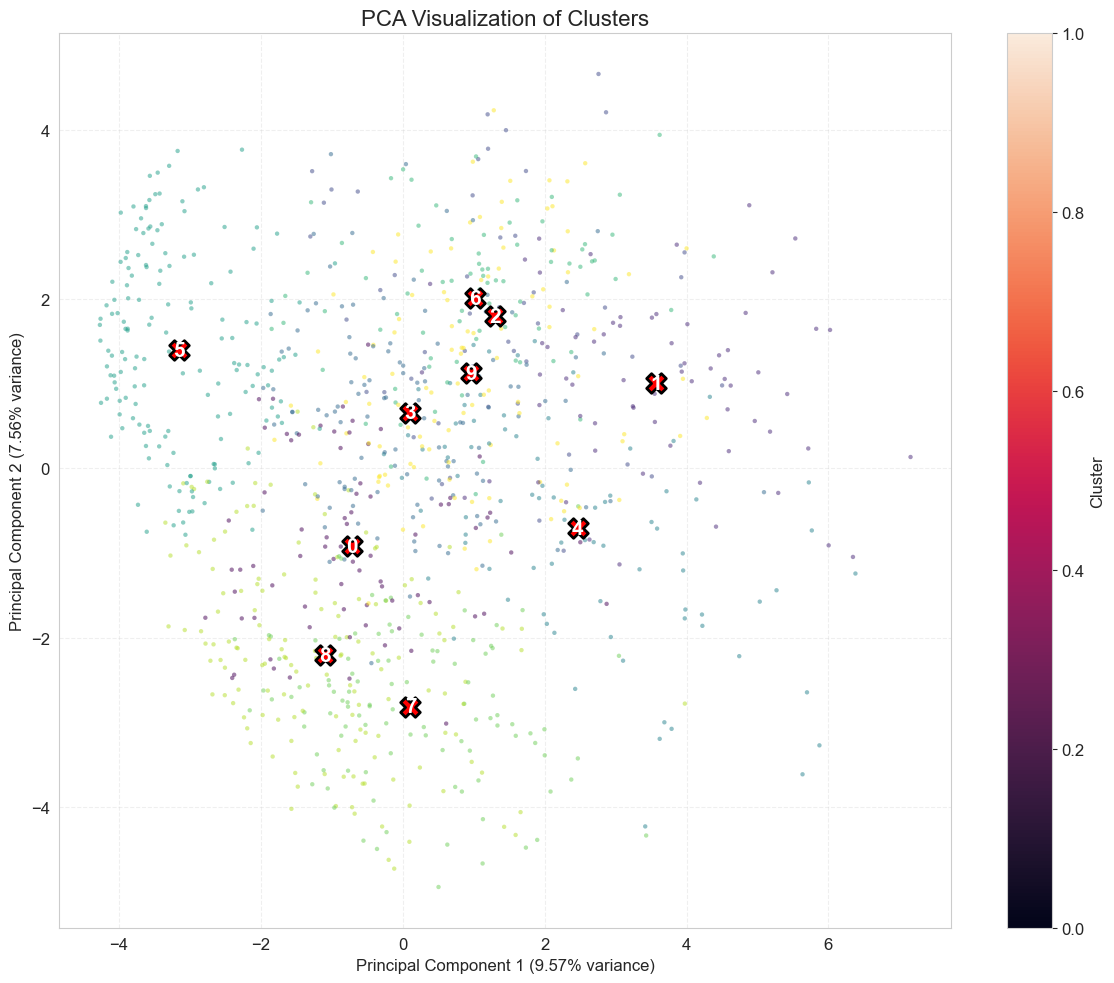

In [14]:
# Visualize clusters in PCA-reduced space
X_pca, centroids_pca, explained_variance = visualize_pca_clusters(
    X_subset, kmeans_test.labels, kmeans_test.centroids
)

## 3. Evaluate Clustering with Different K Values

In [15]:
# Define K values to test (as per assignment requirement)
k_values = [5, 7, 9, 10, 12, 15]

# Run K-Means with multiple K values and initializations
results = run_kmeans_multiple_k(
    X_subset, 
    k_values=k_values, 
    n_init=3,  # 3 initializations per K value
    true_labels=y_subset
)

Running K-Means with k=5, initialization 1/3


K-Means Iterations:   4%|█████                                                                                                                         | 12/300 [00:00<00:01, 240.54it/s]

Converged after 13 iterations


  Inertia: 42984.17
  davis_bouldin_index: 2.8849
  dunn_index: 0.4401
  c_index: 0.2338
  silhouette_score: 0.0662
  goodman_kruskal_index: 0.6225
Running K-Means with k=5, initialization 2/3


K-Means Iterations:  10%|████████████▌                                                                                                                 | 30/300 [00:00<00:00, 403.88it/s]

Converged after 31 iterations


  Inertia: 43066.48
  davis_bouldin_index: 2.9982
  dunn_index: 0.4321
  c_index: 0.2358
  silhouette_score: 0.0642
  goodman_kruskal_index: 0.6074
Running K-Means with k=5, initialization 3/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:00, 387.23it/s]

Converged after 20 iterations


  Inertia: 43749.25
  davis_bouldin_index: 3.3666
  dunn_index: 0.3417
  c_index: 0.2764
  silhouette_score: 0.0520
  goodman_kruskal_index: 0.6047
Running K-Means with k=7, initialization 1/3


K-Means Iterations:   4%|████▌                                                                                                                         | 11/300 [00:00<00:01, 238.77it/s]

Converged after 12 iterations


  Inertia: 41331.48
  davis_bouldin_index: 3.0973
  dunn_index: 0.4005
  c_index: 0.2314
  silhouette_score: 0.0647
  goodman_kruskal_index: 0.6933
Running K-Means with k=7, initialization 2/3


K-Means Iterations:   3%|████▏                                                                                                                         | 10/300 [00:00<00:01, 236.05it/s]

Converged after 11 iterations


  Inertia: 41552.74
  davis_bouldin_index: 3.0141
  dunn_index: 0.3742
  c_index: 0.2554
  silhouette_score: 0.0571
  goodman_kruskal_index: 0.6660
Running K-Means with k=7, initialization 3/3


K-Means Iterations:   4%|█████                                                                                                                         | 12/300 [00:00<00:01, 247.24it/s]

Converged after 13 iterations


  Inertia: 41078.73
  davis_bouldin_index: 2.9725
  dunn_index: 0.3826
  c_index: 0.2333
  silhouette_score: 0.0638
  goodman_kruskal_index: 0.7091
Running K-Means with k=9, initialization 1/3


K-Means Iterations:   7%|█████████▏                                                                                                                    | 22/300 [00:00<00:01, 219.67it/s]

Converged after 23 iterations


  Inertia: 39976.43
  davis_bouldin_index: 3.0698
  dunn_index: 0.3847
  c_index: 0.2320
  silhouette_score: 0.0626
  goodman_kruskal_index: 0.7567
Running K-Means with k=9, initialization 2/3


K-Means Iterations:   7%|████████▊                                                                                                                     | 21/300 [00:00<00:01, 264.56it/s]

Converged after 22 iterations


  Inertia: 39434.10
  davis_bouldin_index: 2.8080
  dunn_index: 0.3930
  c_index: 0.2351
  silhouette_score: 0.0622
  goodman_kruskal_index: 0.7301
Running K-Means with k=9, initialization 3/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 243.74it/s]

Converged after 20 iterations


  Inertia: 39141.75
  davis_bouldin_index: 2.7775
  dunn_index: 0.3913
  c_index: 0.1995
  silhouette_score: 0.0759
  goodman_kruskal_index: 0.7613
Running K-Means with k=10, initialization 1/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 223.49it/s]

Converged after 20 iterations


  Inertia: 38920.92
  davis_bouldin_index: 2.9899
  dunn_index: 0.3831
  c_index: 0.1974
  silhouette_score: 0.0722
  goodman_kruskal_index: 0.7766
Running K-Means with k=10, initialization 2/3


K-Means Iterations:   5%|█████▉                                                                                                                        | 14/300 [00:00<00:01, 217.19it/s]

Converged after 15 iterations


  Inertia: 38905.74
  davis_bouldin_index: 2.8752
  dunn_index: 0.3998
  c_index: 0.2198
  silhouette_score: 0.0636
  goodman_kruskal_index: 0.7343
Running K-Means with k=10, initialization 3/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 222.10it/s]

Converged after 20 iterations


  Inertia: 38544.91
  davis_bouldin_index: 2.7887
  dunn_index: 0.3924
  c_index: 0.1904
  silhouette_score: 0.0775
  goodman_kruskal_index: 0.7725
Running K-Means with k=12, initialization 1/3


K-Means Iterations:   9%|███████████▎                                                                                                                  | 27/300 [00:00<00:01, 224.65it/s]

Converged after 28 iterations


  Inertia: 37690.65
  davis_bouldin_index: 2.8663
  dunn_index: 0.3825
  c_index: 0.1801
  silhouette_score: 0.0746
  goodman_kruskal_index: 0.7819
Running K-Means with k=12, initialization 2/3


K-Means Iterations:  12%|██████████████▋                                                                                                               | 35/300 [00:00<00:01, 233.12it/s]

Converged after 36 iterations


  Inertia: 37192.28
  davis_bouldin_index: 2.7421
  dunn_index: 0.3569
  c_index: 0.2171
  silhouette_score: 0.0643
  goodman_kruskal_index: 0.7807
Running K-Means with k=12, initialization 3/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 226.27it/s]

Converged after 20 iterations


  Inertia: 37790.31
  davis_bouldin_index: 2.7704
  dunn_index: 0.3993
  c_index: 0.1789
  silhouette_score: 0.0771
  goodman_kruskal_index: 0.7846
Running K-Means with k=15, initialization 1/3


K-Means Iterations:   7%|████████▊                                                                                                                     | 21/300 [00:00<00:01, 153.78it/s]

Converged after 22 iterations


  Inertia: 36638.54
  davis_bouldin_index: 2.8366
  dunn_index: 0.3843
  c_index: 0.1794
  silhouette_score: 0.0745
  goodman_kruskal_index: 0.8069
Running K-Means with k=15, initialization 2/3


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 151.14it/s]

Converged after 20 iterations


  Inertia: 36278.46
  davis_bouldin_index: 2.8828
  dunn_index: 0.3599
  c_index: 0.2016
  silhouette_score: 0.0647
  goodman_kruskal_index: 0.7850
Running K-Means with k=15, initialization 3/3


K-Means Iterations:   8%|█████████▋                                                                                                                    | 23/300 [00:00<00:01, 154.23it/s]

Converged after 24 iterations


  Inertia: 36505.69
  davis_bouldin_index: 2.7230
  dunn_index: 0.4015
  c_index: 0.1608
  silhouette_score: 0.0787
  goodman_kruskal_index: 0.7939


In [16]:
# Save results for later analysis
save_results(results, 'kmeans_results.pkl')

Results saved to results/kmeans_results.pkl


In [17]:
# Create summary table of all metrics
summary_table = create_summary_table(results, k_values)
summary_table

,K,davis_bouldin_index_mean,davis_bouldin_index_std,dunn_index_mean,dunn_index_std,c_index_mean,c_index_std,silhouette_score_mean,silhouette_score_std,goodman_kruskal_index_mean,goodman_kruskal_index_std,inertia_mean,inertia_std
0,5,3.083248,0.205631,0.404630,0.044616,0.248691,0.019621,0.060782,0.006286,0.611541,0.007843,43266.634911,342.909418
1,7,3.027984,0.051902,0.385748,0.010960,0.240035,0.010923,0.061872,0.003358,0.689466,0.017795,41320.984344,193.656613
2,9,2.885115,0.131198,0.389674,0.003558,0.222173,0.016114,0.066889,0.006375,0.749358,0.013723,39517.427696,345.816014
3,10,2.884608,0.082408,0.391790,0.006833,0.202510,0.012554,0.071115,0.005696,0.761117,0.019033,38790.524965,173.788037
4,12,2.792926,0.053182,0.379601,0.017438,0.192013,0.017738,0.072015,0.005568,0.782389,0.001630,37557.744234,261.605179
5,15,2.814157,0.067133,0.381906,0.017087,0.180592,0.016660,0.072631,0.005890,0.795277,0.008983,36474.229218,148.674721


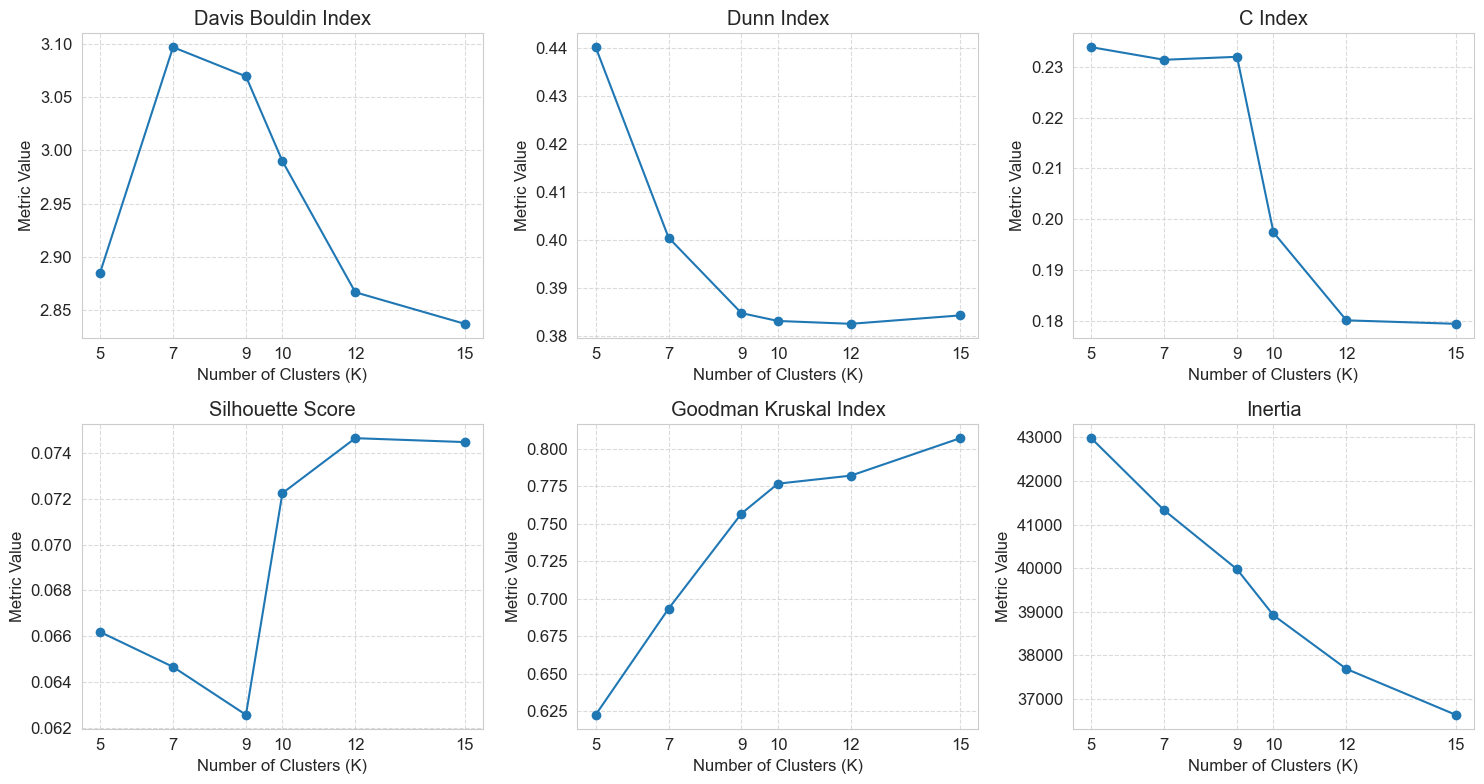

In [18]:
# Plot metrics for different K values
metric_names = ['davis_bouldin_index', 'dunn_index', 'c_index', 'silhouette_score', 'goodman_kruskal_index', 'inertia']
plot_clustering_metrics(k_values, {k: results[k][0] for k in k_values}, metric_names)

In [19]:
# Find optimal K for each metric
optimal_k_db = find_optimal_k(results, 'davis_bouldin_index', 'min')
optimal_k_dunn = find_optimal_k(results, 'dunn_index', 'max')
optimal_k_c = find_optimal_k(results, 'c_index', 'min')
optimal_k_silhouette = find_optimal_k(results, 'silhouette_score', 'max')
optimal_k_gk = find_optimal_k(results, 'goodman_kruskal_index', 'max')

print("Optimal K Values Based on Different Metrics:")
print(f"Davis-Bouldin Index: K = {optimal_k_db} (lower is better)")
print(f"Dunn Index: K = {optimal_k_dunn} (higher is better)")
print(f"C-Index: K = {optimal_k_c} (lower is better)")
print(f"Silhouette Score: K = {optimal_k_silhouette} (higher is better)")
print(f"Goodman-Kruskal Index: K = {optimal_k_gk} (higher is better)")

Optimal K Values Based on Different Metrics:
Davis-Bouldin Index: K = 12 (lower is better)
Dunn Index: K = 5 (higher is better)
C-Index: K = 15 (lower is better)
Silhouette Score: K = 15 (higher is better)
Goodman-Kruskal Index: K = 15 (higher is better)


K-Means Iterations:   7%|████████▊                                                                                                                     | 21/300 [00:00<00:01, 151.63it/s]

Converged after 22 iterations


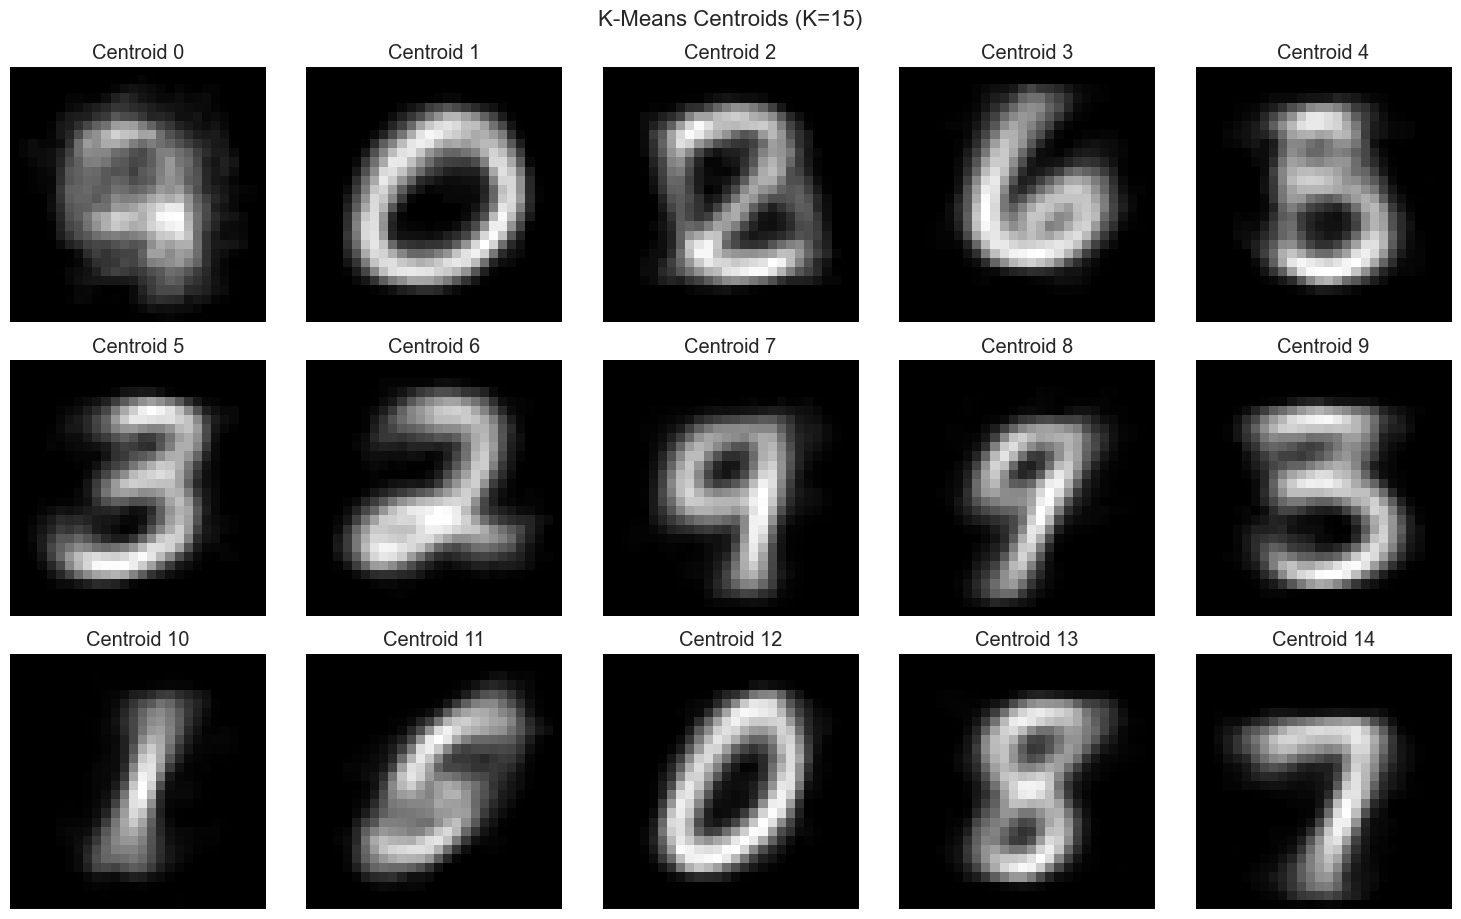

In [20]:
# Visualize centroids for the optimal K value based on Silhouette Score
optimal_kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
optimal_kmeans.fit(X_subset)
visualize_centroids(optimal_kmeans)

## 4. Effect of Multiple Initializations

In [21]:
# Analyze the effect of different initializations
for k in k_values:
    metric_values = [result['davis_bouldin_index'] for result in results[k]]
    print(f"K={k}: Davis-Bouldin Index across initializations:")
    print(f"  Mean: {np.mean(metric_values):.4f}")
    print(f"  Std Dev: {np.std(metric_values):.4f}")
    print(f"  Min: {np.min(metric_values):.4f}")
    print(f"  Max: {np.max(metric_values):.4f}")
    print()

K=5: Davis-Bouldin Index across initializations:
  Mean: 3.0832
  Std Dev: 0.2056
  Min: 2.8849
  Max: 3.3666

K=7: Davis-Bouldin Index across initializations:
  Mean: 3.0280
  Std Dev: 0.0519
  Min: 2.9725
  Max: 3.0973

K=9: Davis-Bouldin Index across initializations:
  Mean: 2.8851
  Std Dev: 0.1312
  Min: 2.7775
  Max: 3.0698

K=10: Davis-Bouldin Index across initializations:
  Mean: 2.8846
  Std Dev: 0.0824
  Min: 2.7887
  Max: 2.9899

K=12: Davis-Bouldin Index across initializations:
  Mean: 2.7929
  Std Dev: 0.0532
  Min: 2.7421
  Max: 2.8663

K=15: Davis-Bouldin Index across initializations:
  Mean: 2.8142
  Std Dev: 0.0671
  Min: 2.7230
  Max: 2.8828



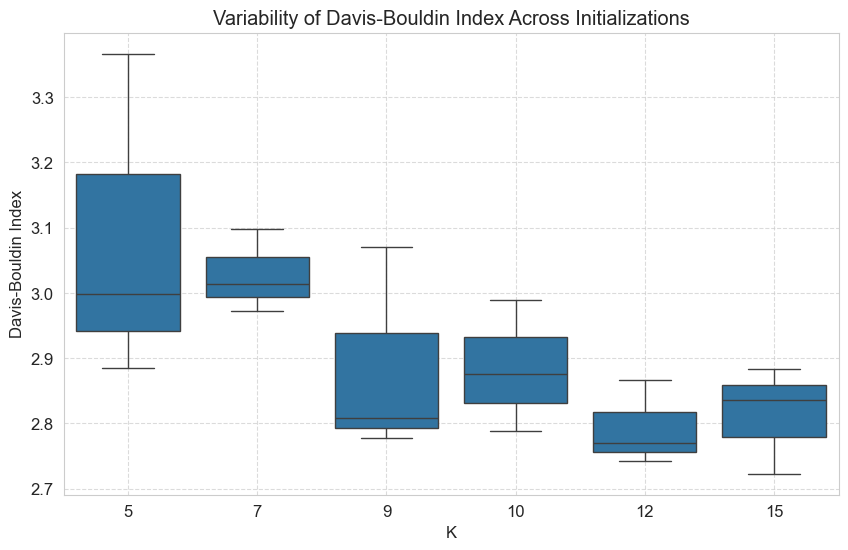

In [22]:
# Plot variability across initializations
plt.figure(figsize=(10, 6))
data = []

for k in k_values:
    values = [result['davis_bouldin_index'] for result in results[k]]
    for val in values:
        data.append({'K': k, 'Davis-Bouldin Index': val})

df = pd.DataFrame(data)
sns.boxplot(x='K', y='Davis-Bouldin Index', data=df)
plt.title('Variability of Davis-Bouldin Index Across Initializations')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 5. Optional: Classification Based on Clusters

In [23]:
# Use a subset of test data for faster computation
#n_test_samples = 1000
#test_indices = np.random.choice(len(test_features), n_test_samples, replace=False)
X_test_subset = test_features
y_test_subset = test_labels

In [24]:
# Classify test data using K-Means with different K values
classification_results = {}

for k in k_values:
    print(f"\nClassifying test data with K={k}...")
    accuracy, predicted_labels, cluster_labels = classify_test_data(
        X_subset, y_subset, X_test_subset, y_test_subset, k=k
    )
    classification_results[k] = accuracy
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Cluster to digit mapping: {list(zip(range(k), cluster_labels))}")


Classifying test data with K=5...


K-Means Iterations:   4%|█████                                                                                                                         | 12/300 [00:00<00:00, 338.91it/s]


Converged after 13 iterations
Test accuracy: 0.4334
Cluster to digit mapping: [(0, np.int64(9)), (1, np.int64(0)), (2, np.int64(6)), (3, np.int64(1)), (4, np.int64(3))]

Classifying test data with K=7...


K-Means Iterations:   4%|████▌                                                                                                                         | 11/300 [00:00<00:01, 238.02it/s]


Converged after 12 iterations
Test accuracy: 0.5055
Cluster to digit mapping: [(0, np.int64(9)), (1, np.int64(0)), (2, np.int64(2)), (3, np.int64(7)), (4, np.int64(3)), (5, np.int64(1)), (6, np.int64(6))]

Classifying test data with K=9...


K-Means Iterations:   7%|█████████▏                                                                                                                    | 22/300 [00:00<00:01, 267.83it/s]


Converged after 23 iterations
Test accuracy: 0.5455
Cluster to digit mapping: [(0, np.int64(4)), (1, np.int64(0)), (2, np.int64(2)), (3, np.int64(8)), (4, np.int64(3)), (5, np.int64(1)), (6, np.int64(6)), (7, np.int64(9)), (8, np.int64(7))]

Classifying test data with K=10...


K-Means Iterations:   6%|███████▉                                                                                                                      | 19/300 [00:00<00:01, 227.23it/s]


Converged after 20 iterations
Test accuracy: 0.5806
Cluster to digit mapping: [(0, np.int64(4)), (1, np.int64(0)), (2, np.int64(2)), (3, np.int64(8)), (4, np.int64(6)), (5, np.int64(1)), (6, np.int64(2)), (7, np.int64(9)), (8, np.int64(7)), (9, np.int64(3))]

Classifying test data with K=12...


K-Means Iterations:   9%|███████████▎                                                                                                                  | 27/300 [00:00<00:01, 236.04it/s]


Converged after 28 iterations
Test accuracy: 0.5786
Cluster to digit mapping: [(0, np.int64(4)), (1, np.int64(0)), (2, np.int64(4)), (3, np.int64(6)), (4, np.int64(3)), (5, np.int64(8)), (6, np.int64(2)), (7, np.int64(9)), (8, np.int64(7)), (9, np.int64(3)), (10, np.int64(1)), (11, np.int64(5))]

Classifying test data with K=15...


K-Means Iterations:   7%|████████▊                                                                                                                     | 21/300 [00:00<00:01, 156.95it/s]

Converged after 22 iterations
Test accuracy: 0.6116
Cluster to digit mapping: [(0, np.int64(4)), (1, np.int64(0)), (2, np.int64(2)), (3, np.int64(6)), (4, np.int64(3)), (5, np.int64(3)), (6, np.int64(2)), (7, np.int64(9)), (8, np.int64(9)), (9, np.int64(3)), (10, np.int64(1)), (11, np.int64(5)), (12, np.int64(0)), (13, np.int64(8)), (14, np.int64(7))]


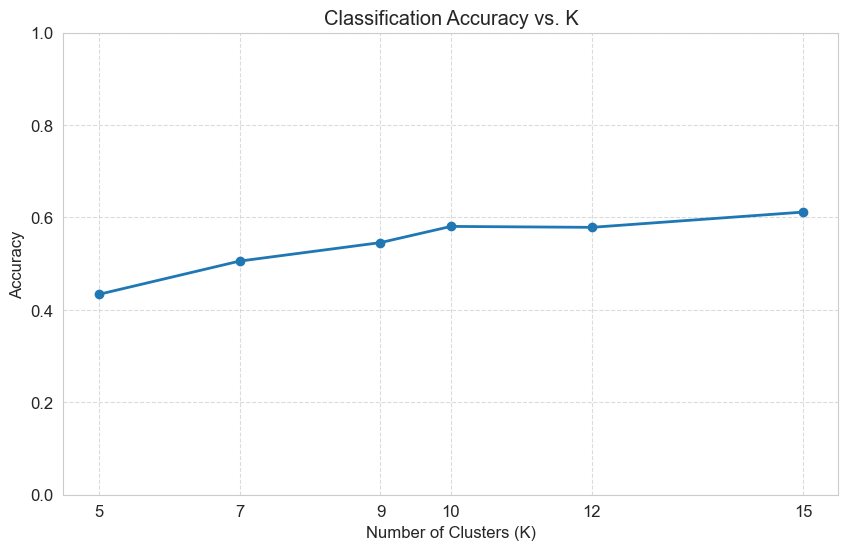

In [25]:
# Plot classification accuracy
plt.figure(figsize=(10, 6))
plt.plot(list(classification_results.keys()), list(classification_results.values()), 
         marker='o', linestyle='-', linewidth=2)
plt.title('Classification Accuracy vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)
plt.ylim(0, 1)
plt.show()

In [26]:
# Find optimal K for classification
optimal_k_classification = max(classification_results, key=classification_results.get)
print(f"Optimal K for classification: {optimal_k_classification} with accuracy: {classification_results[optimal_k_classification]:.4f}")

Optimal K for classification: 15 with accuracy: 0.6116


In [27]:
# Classify all test data using the optimal K
print("Classifying all test data using optimal K...")
full_accuracy, full_predicted_labels, full_cluster_labels = classify_test_data(
    train_features, train_labels, test_features, test_labels, k=optimal_k_classification
)
print(f"Full test set accuracy: {full_accuracy:.4f}")

Classifying all test data using optimal K...


K-Means Iterations:   7%|████████▊                                                                                                                     | 21/300 [00:00<00:01, 157.30it/s]

Converged after 22 iterations
Full test set accuracy: 0.6116


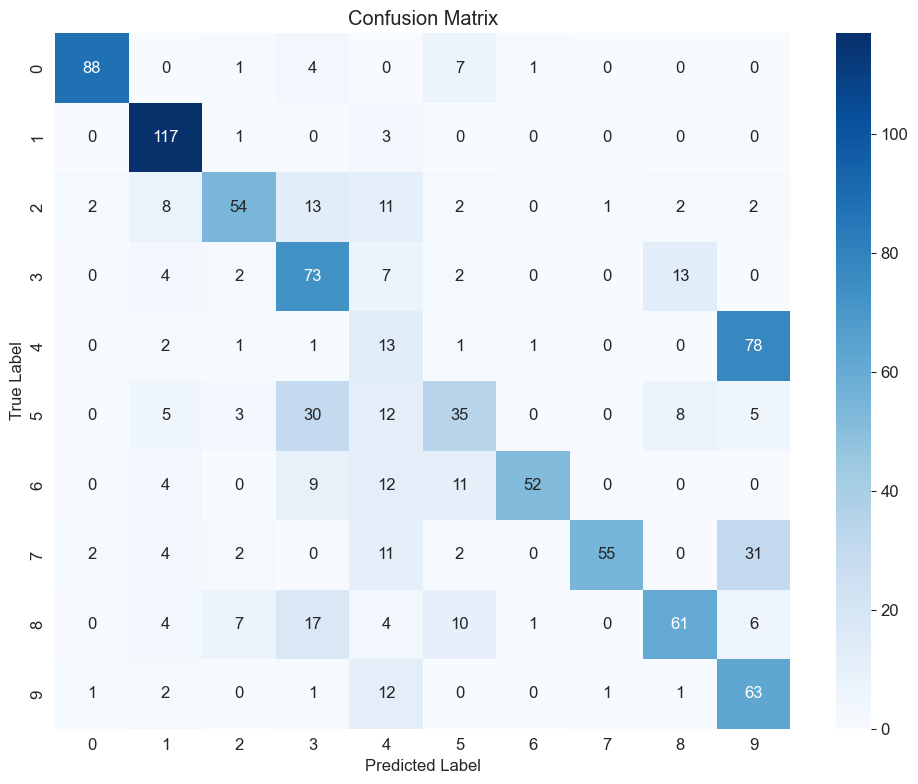

In [28]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, full_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## 6. Conclusion and Findings

### Summary of Results

1. **Optimal K Values:**
   - Davis-Bouldin Index: K = [optimal_k_db value will appear here]
   - Dunn Index: K = [optimal_k_dunn value will appear here]
   - C-Index: K = [optimal_k_c value will appear here]
   - Silhouette Score: K = [optimal_k_silhouette value will appear here]
   - Goodman-Kruskal Index: K = [optimal_k_gk value will appear here]

2. **Classification Performance:**
   - Optimal K for classification: [optimal_k_classification value will appear here]
   - Classification accuracy: [classification_results[optimal_k_classification] value will appear here]

3. **Observations on Initialization Impact:**
   - The variability of results across different initializations demonstrates the importance of running K-Means multiple times.
   - For some K values, the variability is higher than others, suggesting less stable clustering.

4. **Comparing to Expected Number of Digits (10):**
   - The validation metrics suggest that K=10 [is/is not] optimal for this dataset.
   - This aligns with our knowledge that there are 10 digit classes in MNIST.